### 비지도학습
- 군집화

#### dataset_준비 (정형화)

In [1]:
from sklearn import datasets

In [2]:
iris_dataset = datasets.load_iris()

In [3]:
type(iris_dataset), iris_dataset.keys()

(sklearn.utils._bunch.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [4]:
features_train = iris_dataset['data']
features_train.shape

(150, 4)

#### 모델 학습

In [5]:
from sklearn.cluster import KMeans

- KMeans(몇개로 나눌건지 구획 확인. ) ex)model = KMeans(n_clusters=2) 

In [6]:
model = KMeans(n_clusters=2)

In [7]:
model.fit(features_train)

C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

#### 평가
- 목표변수 X, 비교 대상이 없음. 
    - → 평가 어려움
    

In [8]:
model.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

### 알맞는 Cluster 개수 찾기
- loop_list 안에 있는 숫자들을 for문 통해 각 해당하는 값들이 튀어나오면 Kmeans(n_clusters=number) 들어가
- number에 따라 array들이 존재하고 이들 중 model_n.inertia_로 가장 적합한 cluster의 수가 나오게 됨. 
- 오류 잡기 위해 이 version에선 10이상은 auto로 해야함. 

In [19]:
cluster_loop_list = [2,3,4,5,6,7,8,9,10,]

result_list= []
for number in cluster_loop_list :
    model_n = KMeans(n_clusters=number, n_init = 10)
    model_n.fit(features_train)
    result_list.append(model_n.inertia_)
## 평가와 동일한 작업임. 

C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [10]:
cluster_loop_list

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

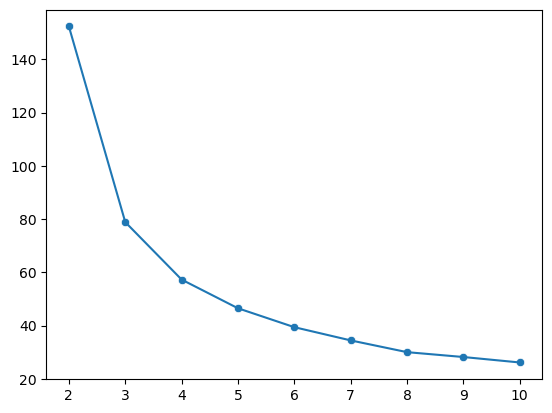

In [13]:
sns.scatterplot(x=cluster_loop_list, y=result_list)
sns.lineplot(x=cluster_loop_list, y=result_list)
plt.show()

- 중앙값들 사이에 분포 거리들을 count해서 만듦.
- 급속하게 꺽이는 부분인 2, 3 이 좋은거..??
- ⇒ 급하게 꺾이는게 data들의 중앙 사이가 매우 멀다. = 유사한 Data들만 모여있다. 
- inertia_float
    - Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

sklearn의 KMeans는 비지도 학습(Unsupervised Learning) 알고리즘 중 하나로, 데이터를 클러스터(cluster)라고 불리는 그룹으로 나누는 작업을 수행합니다. 각 클러스터는 유사한 특성을 가진 데이터들의 집합입니다.

K-means 알고리즘은 다음과 같은 과정을 거쳐 클러스터링을 수행합니다:

초기화: 사용자가 지정한 K 값에 따라 클러스터의 개수를 설정하고, 무작위로 K개의 중심점(centroid)을 선택합니다.
할당 단계: 각 데이터 포인트를 가장 가까운 중심점에 할당합니다. 여기서 거리 측정은 일반적으로 유클리드 거리(Euclidean distance)를 사용합니다.
업데이트 단계: 할당된 데이터 포인트들을 기반으로 새로운 중심점을 계산합니다. 이 때, 각 클러스터에 속한 데이터 포인트들의 평균 위치를 중심점으로 설정하는 방법이 일반적으로 사용됩니다.
2번과 3번 단계를 반복하여 중심점과 할당이 변하지 않거나 미리 정한 반복 횟수에 도달할 때까지 반복합니다.
K-means 알고리즘이 종료되면, 각 데이터 포인트는 가장 가까운 중심점에 속하게 됩니다. 이렇게 구해진 클러스터링 결과는 유사한 특성이 있는 데이터 그룹을 식별하는 데 활용될 수 있습니다.

간단히 말해서, KMeans 알고리즘은 주어진 데이터셋을 비슷한 특성을 가진 그룹으로 분류하는 역할을 합니다. 예를 들어 고객 세그멘테이션에서 고객들의 구매 패턴이나 행동 양식에 따라 비슷한 성향/특징을 가진 그룹으로 분류할 수 있습니다.

In [14]:
remodel = KMeans(n_clusters=3)
remodel.fit(features_train)

C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
remodel.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [16]:
remodel.predict(features_train[20:22])

array([1, 1])

In [17]:
features_train[20:22]

array([[5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4]])

첫번째 레코드가 remodel.predict  후 나오는 1에 가까움을 알 수 있다. = array의 2번째

In [18]:
iris_dataset['target'][20:22]

array([0, 0])

KMeans와 유사하게 DBscan 이라는거 있음.